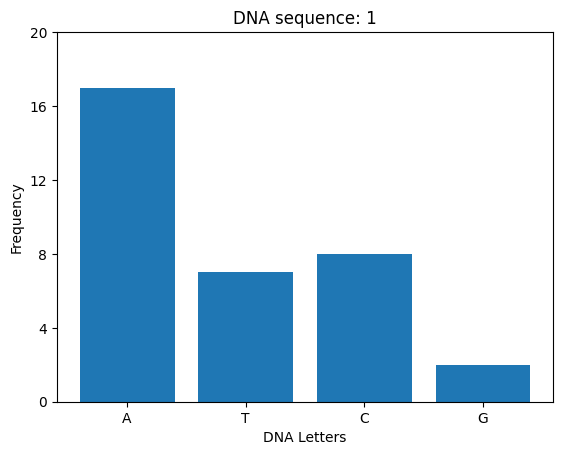

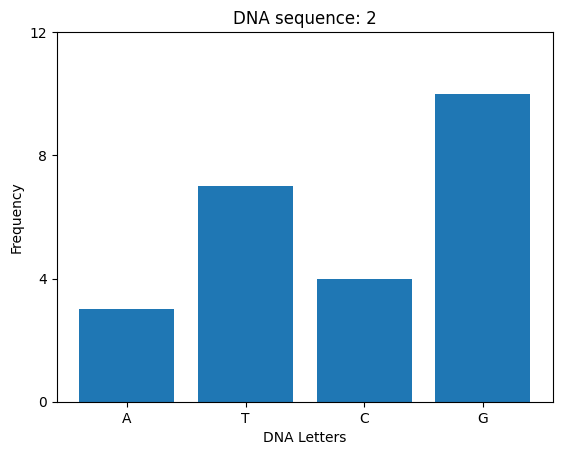

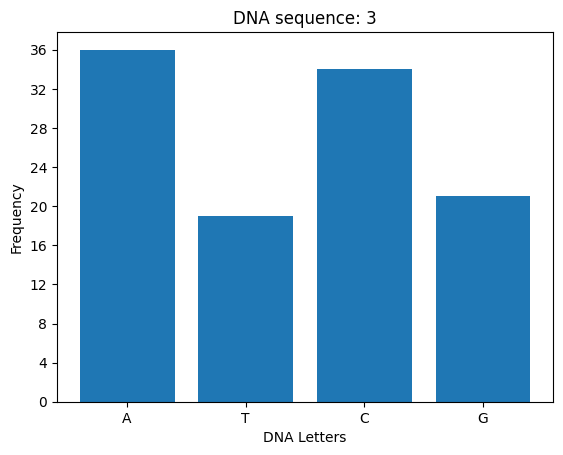

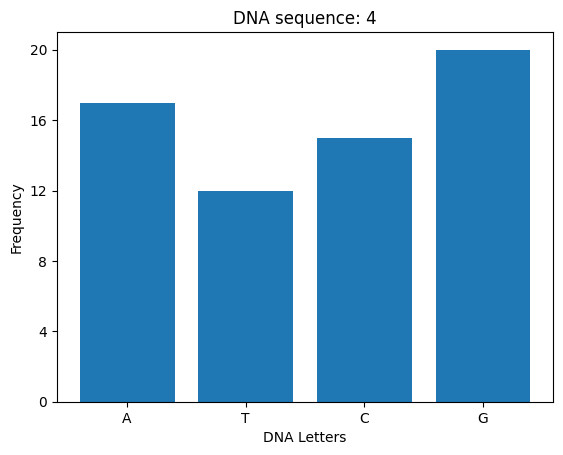

In [2]:
import re
import matplotlib.pyplot as plt

#This function processes any given dna sequence text file with one or more lines per >seq. header
#It returns a list of dictionaries with ATCG as keys, and the amount of each letter as values
def DnaFunction(nameoffile):
    
    #Opening the file and making it into an all lowercase list of lines as items
    with open(nameoffile, "r") as file: 
        List1 = file.read().lower().splitlines()
    
    #In a case where the given file is of a "complicated" type and the iteration comes upon multiple lines of ATCG
    #This block then makes all of them into a one single long line and adds the one line to an updated list "contents2"
    #Essentially the block of code collects ATCG lines and checks what it has collected when stumbling upon the next >seq. header line
    List2 = []
    stringtobeitem = ""                             
    for i in List1:
        if re.match(">seq.", i):                    
            if stringtobeitem != "":                
                List2.append(stringtobeitem)    
                stringtobeitem = ""                 
            
            List2.append(i) #for the sake of first ever >seq. line         
        else:                                       
            stringtobeitem = stringtobeitem + i 
    #For the sake of last ever ATCG line
    if stringtobeitem != "":          
        List2.append(stringtobeitem)            
        stringtobeitem = ""

    #This block of code creates a further updated list without any >seq. headers
    #Appending only ACTG lines to the new list and skipping seq lines
    List3 = []
    for line in List2:
        if not re.match(">seq.", line):
            List3.append(line)
    
    #This block creates the final version of updated list
    #Counting all letters in each item of the previous list and setting them as values of each key A,T,C,G
    List4 = []
    for item in List3:
        A = item.count('a')
        T = item.count('t')
        C = item.count('c')
        G = item.count('g')
        seqdict = {"A": A, "T": T, "C": C, "G": G}
        List4.append(seqdict)
    return List4

dnalistofdict = DnaFunction("dna_raw_complicated.txt")

#new block that loops through each dictionary in the latest list and plots them
count = 0
for i in dnalistofdict:
    count += 1
    xletters = []
    yfrequencies = []
    xletters = i.keys()
    yfrequencies = i.values()

    plt.bar(xletters, yfrequencies)

    #Titles for the graph
    plt.xlabel("DNA Letters")
    plt.ylabel("Frequency")
    plt.title(f"DNA sequence: {count}")

    #setting max total for each frequency
    maxfrequency = max(yfrequencies)
    steps = 4
    plt.yticks(range(0, maxfrequency + steps, steps))

    
    plt.show()



